In [1]:
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
type(digits)

sklearn.utils.Bunch

In [3]:
digits.data.shape

(1797, 64)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

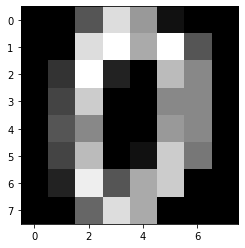

In [8]:
plt.imshow(np.reshape(digits.data[0],(8,8)),cmap=plt.cm.gray)

In [11]:
digits.target[0:4]

array([0, 1, 2, 3])

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_model=SGDClassifier()
sgd_model.fit(digits.data,digits.target)


SGDClassifier()

In [18]:
sgd_model.predict(digits.data[1796].reshape(1, -1))

array([8])

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
predictions=sgd_model.predict(digits.data)

In [21]:
confus_matrix = confusion_matrix(digits.target,predictions)

In [22]:
confus_matrix

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 180,   0,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0, 176,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   6,   0,   0, 171,   0,   1,   2,   0,   1],
       [  0,   0,   0,   1,   0, 180,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,  10,   0,  15,   0,   0,   1,   0, 148,   0],
       [  0,   2,   0,   7,   0,   0,   0,   1,   0, 170]], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test(digits.data,digits.target,test_size=0.3,random_state=27)

In [ ]:
sgd_model.fit(X_train,y_train)

In [ ]:
predictions=sgd_model.predict(X_test)

In [ ]:
confus_matrix(y_test,predictions)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_model,X_train,y_train,cv=3,scoring='accuracy')

In [ ]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [ ]:
plt.plot(np.arrange(0,1257,1),y_train_5,'.')

In [ ]:
y_train_5[200:210]

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdclf=SGDClassifier()
sgdclf.fit(X_train,y_train_5)

In [ ]:
cross_val_score(sgdclf,X_train,y_train_5,cv=3,scoring='accuracy')

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_5_pred=cross_val_predict(sgdclf,X_train,y_train_5,cv=3)

In [ ]:
confustion_matrix(y_train_5,y_train_5_pred)

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
precision_score(y_train_5,y_train_5_pred)

In [ ]:
recall_score(y_train_5,y_train_5_pred)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_5_pred)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
#y_scores=cross_val_predict(sgdclf,X_train,y_train_5,cv=3,method='decision_function')
fpr,tpr,thresholds=roc_curve(y_train_5,y_train_5_pred)

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.grid(True)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_train_5_pred)